> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

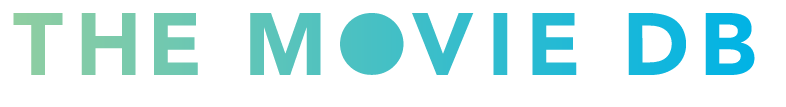

# Project: Investigate the TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb). TMDb is a community-built movie and TV database, where data has been provided by the internet community dating back to 2008. This report will analyze the movie data for trends and answer questions like:
* Which genres are most prevalent from year to year?
* What kinds of properties are associated with movies that have high revenues?
* Which directors and actors are associated with high ratings?
* Which Production companies have made the highest profit?
* Are sequels as popular as the first movie?


> **Tip**:At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
A dependent variable is the variable being tested in a scientific experiment.
The dependent variable is "dependent" on the independent variable. As the experimenter changes the independent variable, the change in the dependent variable is observed and recorded. When you take data in an experiment, the dependent variable is the one being measured. 

# Data Wrangling

In this section of the report:
* Load in the data
* Check for cleanliness,
* Trim and clean your dataset for analysis. 


In [247]:
#Load and Clean the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# reading the movie dataframe
df = pd.read_csv('tmdb-movies.csv')
# look at the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [248]:
# prints out first lines to inspect data  
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [249]:

df1 = df[['release_year','genres']]
#print(df1)
df2 = df1.query('release_year==1966')
count = df2.count()
print('count',count[0])

#print(df2)

count 46


In [250]:
#Examine info about the data types in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [251]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [252]:
#Check Columns for 0 values
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [253]:
# this returns the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [254]:
# check for duplicates in the data
sum(df.duplicated())

1

## Cleaning Decisions based on Data Wrangling

* Drop duplicates rows.
* Drop irrelevant columns;
    * homepage
    * imdb_id 
    * tagline 
    * overview
    * budget_adj
    * revenue_adj
* Drop the null values columns where numbers are low; 
    * cast
    * director
    * genres
* To preserve data integrity, do not drop the columns where null values are high, to avoid dropping too much data. 
* Replace zero values with mean for the high zero value columns;
    * budget 
    * revenue
* Drop the zero values columns where numbers are low; 
    * runtime.

In [255]:
# budgets of zero must be missing values
df_clean=df.query('budget>0').copy()

In [256]:
#Check Columns for 0 values
df_clean.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                 1315
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                    3
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj             1315
dtype: int64

## Question 1: Trend of movies released over thedata set time period

In [257]:
movies_count = df.groupby('release_year').count()['id']
movies_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

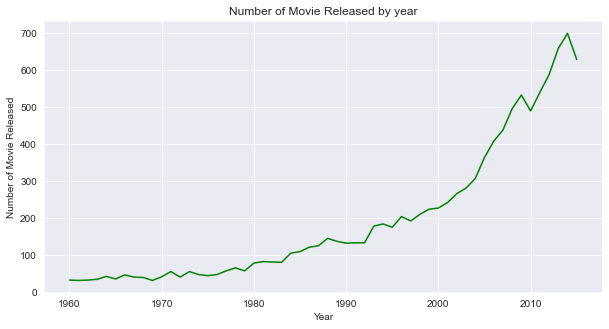

In [258]:
#set style
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movies_count.index
# y is number of movie released
y = movies_count
#set size
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'g', label = 'mean')
#set title and labels
plt.title('Number of Movie Released by year')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

In [259]:
## Question 2: Keywords Trends by Generation

In [260]:
# sort the movies by release year.
release_year= df.release_year.unique()
release_year= np.sort(release_year)
release_year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [261]:
# Segment the years into decades.
# 1960s
decade1960s =release_year[:10]
# 1970s
decade1970s =release_year[10:20]
# 1980s
decade1980s =release_year[20:30]
# 1990s
decade1990s = release_year[30:40]
# 2000s
decade2000 = release_year[40:]

In [262]:
df_clean['budget'] = df_clean['budget'].fillna(df_clean['budget'].mean())
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [342]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col):
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    #count their number of appeared times and
    #choose the top3
    top = new['top'].value_counts().head(num)
    return top

In [405]:
def most_frequent(year_vals,j):
 #print("Year",j)
 #print("Drama count",year_vals.count('Drama'))
 #print("Comedy count",year_vals.count('Comedy'))   
 #print("Year vals count:",len(year_vals))
 res = max(set(year_vals), key = year_vals.count)
 #print("Element with highest frequency:\n",res)
            
   # print("num",num)
 return res

In [406]:
# function to calculate most popular genre per year
def calc_year_genre(year_genres,j):
 year_vals=[]   
           #print("year passed to function",year_genres)
 for n in year_genres:
            #print("n",n)
            #print("year test for n val in year:",year,n)
            sep_cols = n.split("|")
            #print("sep_cols",sep_cols)
            for m in sep_cols:
             year_vals.append(m)
            #print("year_vals:",year_vals)
           #for y in x:
            #decade_genres=decade_genres+y+""
            #print("function_test",decade, "sep_col",sep_col)
             #test =('test',decade)
            #decade_genres.insert(y)
 #print("year vals",year_vals)

 result= most_frequent(year_vals, j)
 print("year_vals function result:",result)
 return year_vals

In [428]:
# year list of decades
decades = [decade1960s, decade1970s, decade1980s, decade1990s, decade2000]
#generation name
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']

#creat an empty dataframe
df_decades = pd.DataFrame()
n = 0
j = 0
df1 = df[['release_year','genres']]
df_top_genres = pd.DataFrame()
index = 0
for i in decades:
    #print(i)
    for j in i:
         df2 = pd.DataFrame()
         year_genres=[]
         print(j)
         decade=names[n]
         df2 = df1.query('release_year==@j')
         df2.shape  
         for column in df2[['genres']]:
            print("Column",columnData.values.astype(str))
            year_genres = columnData.values.astype(str)
            print("lenght of data",j,len(year_genres))
          #print("Drama count",year_vals.count('Drama'))
          #print("Comedy count",year_vals.count('Comedy'))    
         # for n in year_genres:
           # print("year test for n val",n)
            top_year =calc_year_genre(year_genres, j)
       
            print("top_genre",names[n])
          #print(top_year)
          
    #"top_"+str(n)=some_calculation        
    n+=1
    #print("End of decade",n)

    # first filter dataframe with the selected generation, and store it to dfn
   # dfn = df[df.release_year.isin(s)] 
    #apply the find_top function with the selected frame, using the result create a dataframe, store it to dfn2 
   # dfn2 = pd.DataFrame({'year' :names[index],'top': calc_year_genre(year_genres)})
     #append dfn2 to df_q2
   # df_r3 = df_r3.append(dfn2)
    #index +=1
#df_r3    
          
            
            
            #print("individual_split",x)
          #print("decade_genres",decade_genres)
          #alist = decade_genres.split("|") 
          #top = find_top(columnData.values)
          #print(alist)
          
          #dfn2 = pd.DataFrame({'year' :names[index],'top': find_top(dfn.genres,1)})
         #count = df2.count()
         #print('count',count[0])
 #dfn.head()
     #print("year",j)
    #print(df["genres"])
    # making boolean series for a team name
     #filter = df["release_year"]==j
    #print(filter)  
  # filtering data 
    #dfn = df.where(filter, inplace = True)
    
# display
    #dfn.head()
#print(top_decade)   
    

1960
Column ['Action|Adventure|Science Fiction|Thriller'
 'Action|Adventure|Science Fiction|Thriller'
 'Adventure|Science Fiction|Thriller'
 'Action|Adventure|Science Fiction|Fantasy' 'Action|Crime|Thriller'
 'Western|Drama|Adventure|Thriller'
 'Science Fiction|Action|Thriller|Adventure'
 'Drama|Adventure|Science Fiction' 'Family|Animation|Adventure|Comedy'
 'Comedy|Animation|Family' 'Action|Adventure|Crime'
 'Science Fiction|Fantasy|Action|Adventure' 'Drama|Science Fiction'
 'Action|Comedy|Science Fiction' 'Action|Adventure|Science Fiction'
 'Crime|Drama|Mystery|Western' 'Crime|Action|Thriller'
 'Science Fiction|Action|Adventure' 'Romance|Fantasy|Family|Drama'
 'War|Adventure|Science Fiction'
 'Action|Family|Science Fiction|Adventure|Mystery' 'Action|Drama'
 'Action|Drama|Thriller' 'Drama|Romance' 'Comedy|Drama' 'Action' 'Comedy'
 'Crime|Comedy|Action|Adventure' 'Drama|Thriller|History'
 'Action|Science Fiction|Thriller' 'Mystery|Drama'
 'Crime|Action|Science Fiction' 'Comedy|Music' '

Column ['Action|Adventure|Science Fiction|Thriller'
 'Action|Adventure|Science Fiction|Thriller'
 'Adventure|Science Fiction|Thriller'
 'Action|Adventure|Science Fiction|Fantasy' 'Action|Crime|Thriller'
 'Western|Drama|Adventure|Thriller'
 'Science Fiction|Action|Thriller|Adventure'
 'Drama|Adventure|Science Fiction' 'Family|Animation|Adventure|Comedy'
 'Comedy|Animation|Family' 'Action|Adventure|Crime'
 'Science Fiction|Fantasy|Action|Adventure' 'Drama|Science Fiction'
 'Action|Comedy|Science Fiction' 'Action|Adventure|Science Fiction'
 'Crime|Drama|Mystery|Western' 'Crime|Action|Thriller'
 'Science Fiction|Action|Adventure' 'Romance|Fantasy|Family|Drama'
 'War|Adventure|Science Fiction'
 'Action|Family|Science Fiction|Adventure|Mystery' 'Action|Drama'
 'Action|Drama|Thriller' 'Drama|Romance' 'Comedy|Drama' 'Action' 'Comedy'
 'Crime|Comedy|Action|Adventure' 'Drama|Thriller|History'
 'Action|Science Fiction|Thriller' 'Mystery|Drama'
 'Crime|Action|Science Fiction' 'Comedy|Music' 'Thril

In [409]:
df2.info

<bound method DataFrame.info of      release_year                                     genres
0            2015  Action|Adventure|Science Fiction|Thriller
1            2015  Action|Adventure|Science Fiction|Thriller
2            2015         Adventure|Science Fiction|Thriller
3            2015   Action|Adventure|Science Fiction|Fantasy
4            2015                      Action|Crime|Thriller
..            ...                                        ...
624          2015                        Comedy|Drama|Family
625          2015                                     Comedy
626          2015                                Documentary
627          2015                                Documentary
628          2015                                Documentary

[629 rows x 2 columns]>

In [425]:
df1 = df[['release_year','genres']]
df2 = df1.query('release_year==2014') 
df2.shape

(700, 2)

In [245]:
# function to calculate most popular genre per decade

In [246]:
df_clean.describe

<bound method NDFrame.describe of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10835    5923  tt0060934    0.299911   12000000    20000000   
10841   42701  tt0062262    0.264925      75000           0   
10848    2161  tt0060397    0.207257    5115000    12000000   
10855   13343  tt0059221    0.141026     700000           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4             

In [20]:
df_clean['budget'] = df_clean['budget'].fillna(df_clean['budget'].mean())

In [21]:
df_clean['popularity'] = df_clean['popularity'].fillna(df_clean['popularity'].mean())
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [22]:
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [23]:
# see the budget breakdown
df_clean['budget'].describe()

count    5.170000e+03
mean     3.073943e+07
std      3.890065e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [24]:
# use .loc[] to select the rows I want
df_clean['budget'].describe().loc[['min','50%','75%','max']]

min            1.0
50%     17000000.0
75%     40000000.0
max    425000000.0
Name: budget, dtype: float64

In [25]:
# List of Intervals
budget_intervals = df_clean['budget'].describe().loc[['min','50%','75%','max']].values
# List of labels
budget_labels = ['Low','Moderate','High']
print('budget intervals are', budget_intervals, '\nLabels are', budget_labels)

budget intervals are [1.00e+00 1.70e+07 4.00e+07 4.25e+08] 
Labels are ['Low', 'Moderate', 'High']


In [26]:
# create new variable using pd.cut()
df_clean['Budget Intervals']=pd.cut(df_clean['budget'],
                                   bins=budget_intervals,
                                   labels=budget_labels,
                                   include_lowest=True)
# Check
df_clean['Budget Intervals'].value_counts().sort_index()

Low         2590
Moderate    1381
High        1199
Name: Budget Intervals, dtype: int64

In [27]:
df_clean[['Budget Intervals','budget']]

,Budget Intervals,budget
0,High,150000000
1,High,150000000
2,High,110000000
3,High,200000000
4,High,190000000
...,...,...
10835,Low,12000000
10841,Low,75000
10848,Low,5115000
10855,Low,700000


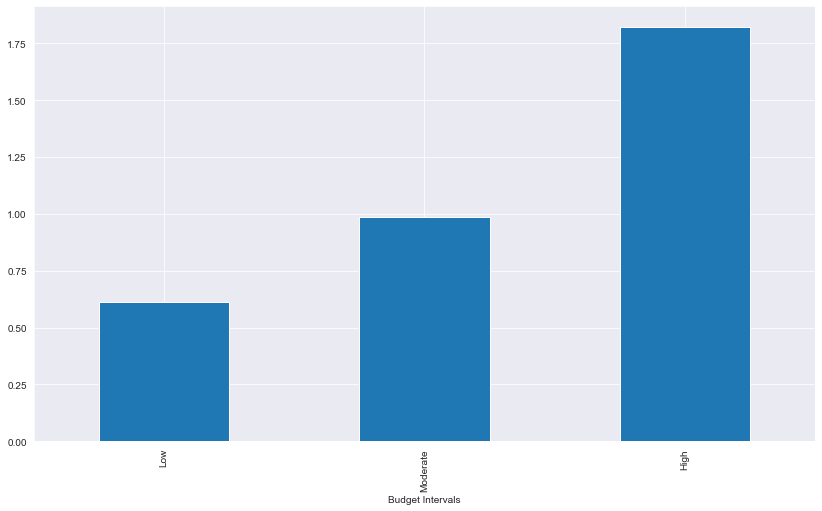

In [28]:
df_clean.groupby(['Budget Intervals'])['popularity'].mean().plot.bar(figsize=[14,8]);

In [29]:
df_clean.groupby(['Budget Intervals','release_year'])['popularity'].mean()

Budget Intervals  release_year
Low               1960            0.890063
                  1961            0.650838
                  1962            0.672336
                  1963            0.702942
                  1964            0.921256
                                    ...   
High              2011            1.810899
                  2012            2.351899
                  2013            2.219438
                  2014            4.123857
                  2015            5.453505
Name: popularity, Length: 168, dtype: float64

In [30]:
df_clean.groupby(['Budget Intervals','release_year'])['popularity'].mean().unstack('Budget Intervals').head()

Budget Intervals,Low,Moderate,High
release_year,,,
1960,0.890063,NaN,NaN
1961,0.650838,NaN,NaN
1962,0.672336,NaN,NaN
1963,0.702942,0.804533,NaN
1964,0.921256,NaN,NaN


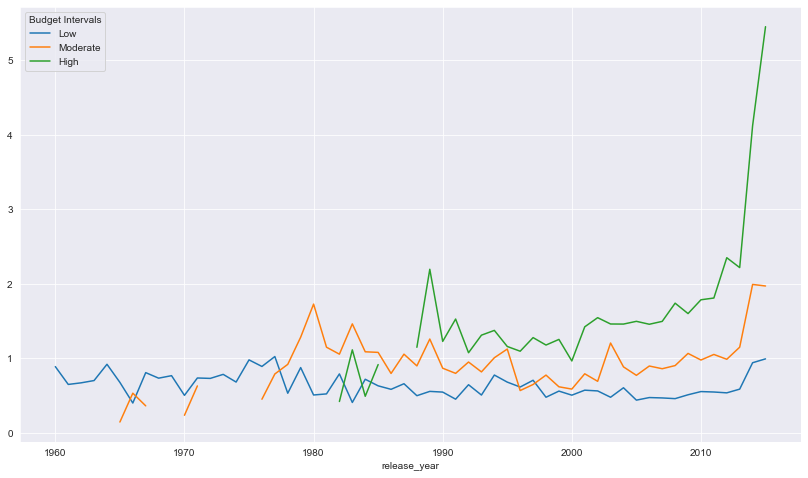

In [31]:
#plot
# 1. Years on the x axis ( as they are the rows)
# 2. Budget intervals are te hue variable (as they are the columns)
df_clean.groupby(['Budget Intervals','release_year'])['popularity'].mean().unstack('Budget Intervals').plot(figsize=[14,8]);

In [49]:
# see the budget breakdown
df_clean['popularity'].describe()

count    5170.000000
mean        0.992323
std         1.329145
min         0.001117
25%         0.348024
50%         0.623921
75%         1.152401
max        32.985763
Name: popularity, dtype: float64

In [50]:
# use .loc[] to select the rows I want
df_clean['popularity'].describe().loc[['min','50%','75%','max']]

min     0.001117
50%     0.623921
75%     1.152401
max    32.985763
Name: popularity, dtype: float64

In [51]:
# List of Intervals
popularity_intervals = df_clean['popularity'].describe().loc[['min','50%','75%','max']].values
# List of labels
popularity_labels = ['Low','Moderate','High']
print('popularity intervals are', popularity_intervals, '\nLabels are', popularity_labels)

popularity intervals are [1.11700000e-03 6.23921000e-01 1.15240125e+00 3.29857630e+01] 
Labels are ['Low', 'Moderate', 'High']


In [52]:
# create new variable using pd.cut()
df_clean['Popularity Intervals']=pd.cut(df_clean['popularity'],
                                   bins=popularity_intervals,
                                   labels=popularity_labels,
                                   include_lowest=True)
# Check
df_clean['Popularity Intervals'].value_counts().sort_index()

Low         2585
Moderate    1292
High        1293
Name: Popularity Intervals, dtype: int64

In [53]:
df_clean[['Popularity Intervals','popularity']]

,Popularity Intervals,popularity
0,High,32.985763
1,High,28.419936
2,High,13.112507
3,High,11.173104
4,High,9.335014
...,...,...
10835,Low,0.299911
10841,Low,0.264925
10848,Low,0.207257
10855,Low,0.141026


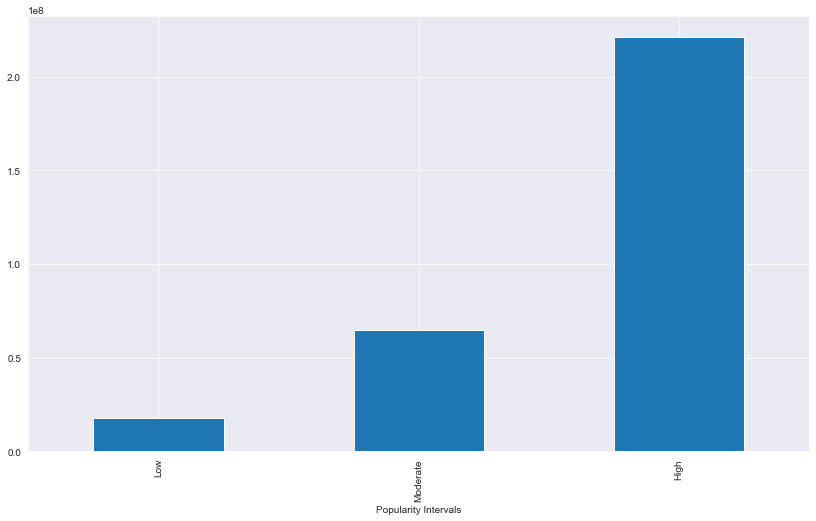

In [54]:
df_clean.groupby(['Popularity Intervals'])['revenue'].mean().plot.bar(figsize=[14,8]);

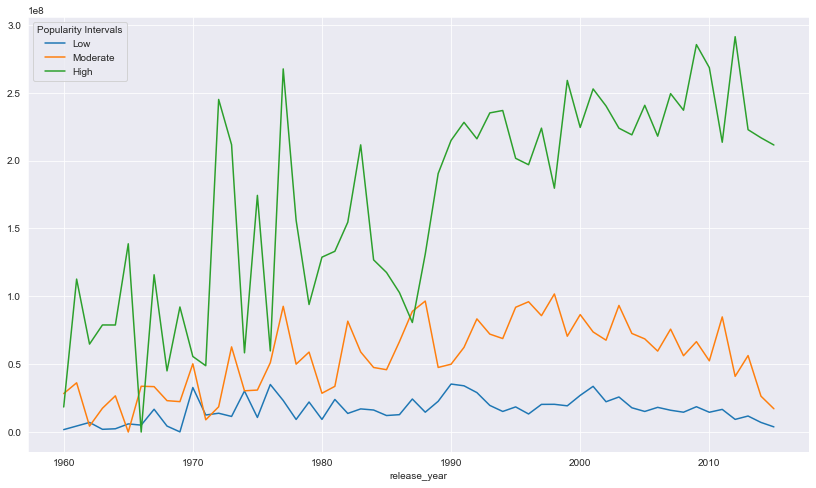

In [55]:
df_clean.groupby(['Popularity Intervals','release_year'])['revenue'].mean().unstack('Popularity Intervals').plot(figsize=[14,8]);

<a id='wrangling'></a>
# Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [178]:
# prints out first lines to inspect data  
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [179]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [180]:
# this returns the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [181]:
#  although the datatype for diagnosis appears to be object, further
# investigation shows it's a string
type(df['production_companies'][0])

str

In [182]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [183]:
#Check Columns for 0 values
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [184]:
zero_budget = df.query('budget== 0')
zero_budget.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [185]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [186]:
# this returns the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [187]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [188]:
# check for duplicates in the data
sum(df.duplicated())

1

## Cleaning Decisions based on Data Wrangling

* Drop duplicates rows.
* Drop irrelevant columns;
    * homepage
    * imdb_id 
    * tagline 
    * overview
    * budget_adj
    * revenue_adj
* Drop the null values columns where numbers are low; 
    * cast
    * director
    * genres
* To preserve data integrity, do not drop the columns where null values are high, to avoid dropping too much data. 
* Replace zero values with null values for the high zero value columns;
    * budget 
    * revenue
* Drop the zero values columns where numbers are low; 
    * runtime.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

# Data Cleaning

In [189]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop columns with no value

df.drop(df.columns[[1, 7, 9, 11, 19, 20]], axis = 1, inplace = True)

In [190]:
# Verify the columns are dropped.
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [191]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [192]:
# check for duplicates in the data
sum(df.duplicated())

0

In [193]:
#drop the null values with low occurance 
nullVals = ['cast', 'director', 'genres']
df.dropna(subset = nullVals, how='any', inplace=True)

In [194]:
# verify null values have been dropped.
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [195]:
df.query('budget == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,desert|hunting,95,Thriller,Furthur Films,4/17/15,81,5.5,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,monster|carry on|horror spoof,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966


In [196]:
df.query('revenue == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [197]:
#replace zero values with null values.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df.query('budget == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [198]:
df.query('revenue == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [199]:
# Verify that nulls are added in the budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10731 non-null  int64  
 1   popularity            10731 non-null  float64
 2   budget                5153 non-null   float64
 3   revenue               4843 non-null   float64
 4   original_title        10731 non-null  object 
 5   cast                  10731 non-null  object 
 6   director              10731 non-null  object 
 7   keywords              9306 non-null   object 
 8   runtime               10731 non-null  int64  
 9   genres                10731 non-null  object 
 10  production_companies  9772 non-null   object 
 11  release_date          10731 non-null  object 
 12  vote_count            10731 non-null  int64  
 13  vote_average          10731 non-null  float64
 14  release_year          10731 non-null  int64  
dtypes: float64(4), int6

In [200]:
# Finally, drop columns with a small number of zero values: runtime.

# directly filter the runtime data with nonzero value

df.query('runtime != 0', inplace=True)

#check

df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


## Cleaning Result Summary

In the data analysis and cleaning process analysis, I dropped irrelevant columns, converted columns with large zero values to null From the table below, we can see that the data in each column are almost precise without too many null values. My cleaning goal was to keep the data integrity while dropping invalid and unnecessary data. There are still null values in the budget, revenue, and production company columns, but they are helpful for analysis to keep them. The data now has 10703 entries and 15 columns.



In [201]:
# Data was reduced from (10866, 21)
df.shape

(10703, 15)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10703 non-null  int64  
 1   popularity            10703 non-null  float64
 2   budget                5150 non-null   float64
 3   revenue               4843 non-null   float64
 4   original_title        10703 non-null  object 
 5   cast                  10703 non-null  object 
 6   director              10703 non-null  object 
 7   keywords              9293 non-null   object 
 8   runtime               10703 non-null  int64  
 9   genres                10703 non-null  object 
 10  production_companies  9759 non-null   object 
 11  release_date          10703 non-null  object 
 12  vote_count            10703 non-null  int64  
 13  vote_average          10703 non-null  float64
 14  release_year          10703 non-null  int64  
dtypes: float64(4), int6

In [203]:
# Find the mean and median popularity of each level with groupby
result_mean = df.groupby('genres')['popularity'].mean()
result_mean 

genres
Action                                      0.591587
Action|Adventure                            0.690710
Action|Adventure|Animation                  0.454663
Action|Adventure|Animation|Comedy|Drama     0.370019
Action|Adventure|Animation|Comedy|Family    0.063246
                                              ...   
Western|Drama|Crime|Romance                 0.393664
Western|History                             0.128234
Western|History|War                         0.948560
Western|Horror|Thriller                     0.354484
Western|Thriller                            0.387592
Name: popularity, Length: 2019, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
* Which genres are most prevalent from year to year?
* What kinds of properties are associated with movies that have high revenues?


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

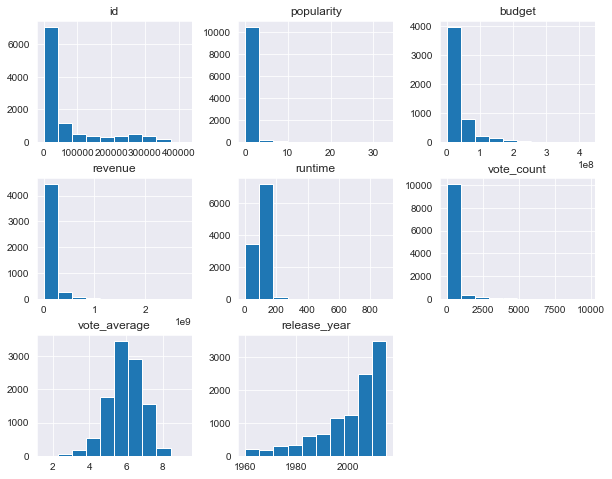

In [204]:
df.hist(figsize=(10,8))

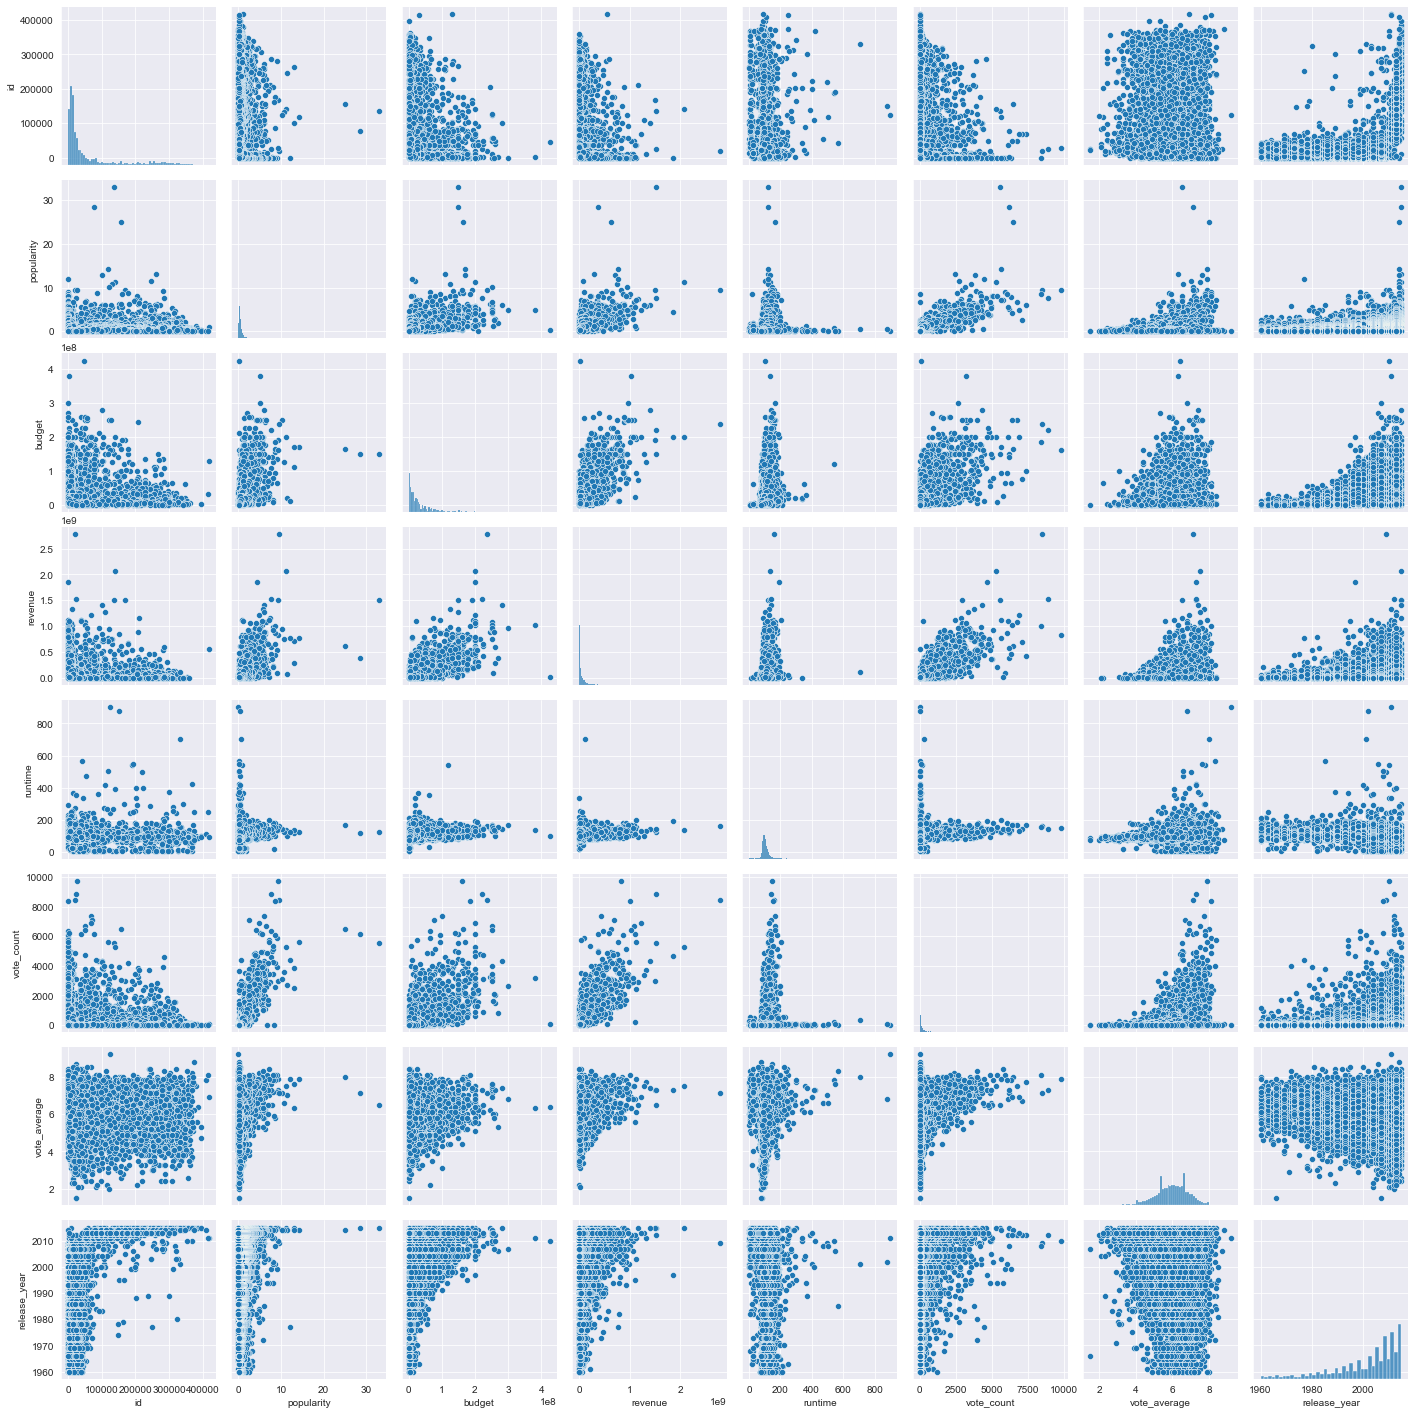

In [169]:
sns.pairplot(df);

In [170]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

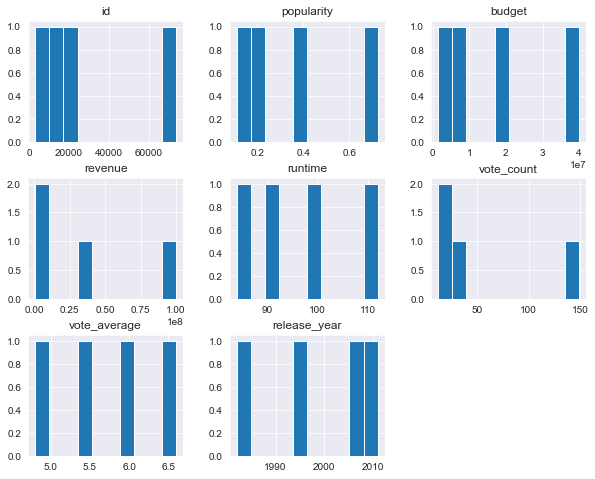

In [171]:
df.quantile([.1, .25, .5, .75], axis = 0).hist(figsize=(10,8))

In [172]:
max= df.budget.max()
print(max)

425000000.0


In [173]:
min=df.budget.min()
print(min)

1.0


In [174]:
Q1 = max * 0.25
print(Q1)

106250000.0


In [175]:
Q2 = max * 0.5
print(Q2)

212500000.0


In [176]:
Q3 = max * 0.75
print(Q3)

318750000.0


In [177]:
cut_points = [min, Q1, Q2, Q3, max]
print(cut_points)
labels = ["low","medium","high","very_high"]
df['budget_bracket'] = pd.cut(df['budget'], cut_points,labels=labels)
print(df)

[1.0, 106250000.0, 212500000.0, 318750000.0, 425000000.0]
           id  popularity       budget       revenue  \
0      135397   32.985763  150000000.0  1.513529e+09   
1       76341   28.419936  150000000.0  3.784364e+08   
2      262500   13.112507  110000000.0  2.952382e+08   
3      140607   11.173104  200000000.0  2.068178e+09   
4      168259    9.335014  190000000.0  1.506249e+09   
...       ...         ...          ...           ...   
10861      21    0.080598          NaN           NaN   
10862   20379    0.065543          NaN           NaN   
10863   39768    0.065141          NaN           NaN   
10864   21449    0.064317          NaN           NaN   
10865   22293    0.035919      19000.0           NaN   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...

In [178]:

# Calcualte the mean popularity
popularityMean = df.groupby('release_year').mean()['popularity']
popularityMean.tail()


release_year
2011    0.685607
2012    0.620326
2013    0.639309
2014    0.910027
2015    1.055081
Name: popularity, dtype: float64

In [179]:
# compute the mean for popularity
popularityMedian = df.groupby('release_year').median()['popularity']
popularityMedian.tail()

release_year
2011    0.420930
2012    0.344263
2013    0.356506
2014    0.383337
2015    0.407396
Name: popularity, dtype: float64

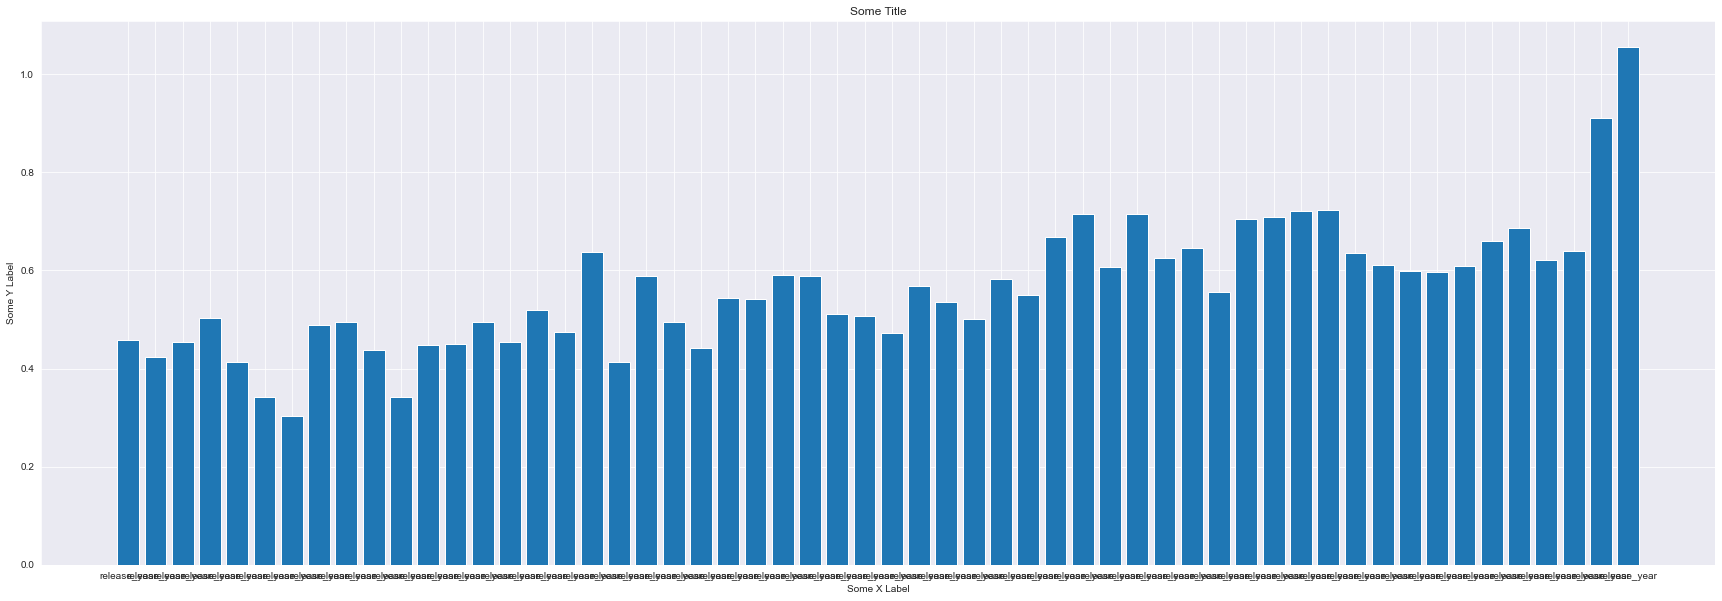

In [371]:
x=popularityMean.index
plt.figure(figsize=(30, 10))
y=popularityMean
plt.bar(x,y,tick_label='release_year')

plt.title('Some Title')
plt.xlabel('Some X Label')
plt.ylabel('Some Y Label');

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
* Which directors and actors are associated with high ratings?
* Which Production companies have made the highest profit?
* Are sequels as popular as the first movie?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!